In [19]:
%reset -f

import ROOT

rdf = ROOT.RDataFrame("h22","data/lvl1_eppi0.inb.root")
rdf = rdf.Define("vals","""
auto beam = ROOT::Math::PxPyPzMVector(0,0,10.6041,0);
auto targ = ROOT::Math::PxPyPzMVector(0,0,0,0.938);
auto ele = ROOT::Math::PxPyPzMVector(ex,ey,ez,0);
auto pro = ROOT::Math::PxPyPzMVector(px,py,pz,0.938);
auto g1 = ROOT::Math::PxPyPzMVector(g1x,g1y,g1z,0);
auto g2 = ROOT::Math::PxPyPzMVector(g2x,g2y,g2z,0);
auto epx = beam+targ-ele-pro;
auto epggx = epx - g1-g2;
double me = beam.E() + targ.E() - ele.E() - pro.E() - g1.E() - g2.E();

std::vector<double> vals = {epx.M2(), me, epggx.Px(), epggx.Py()};
return vals;
""")

rdf = rdf.Define("mm2","vals[0]")
rdf = rdf.Define("me","vals[1]")
rdf = rdf.Define("mpx","vals[2]")
rdf = rdf.Define("mpy","vals[3]")


h0mm2 = rdf.Histo1D(("h0mm2","MM2 epX",200,-0.5,1),"mm2")
h0me = rdf.Histo1D(("h0me","Missing energy",200,-0.5,1),"me")
h0mpx = rdf.Histo1D(("h0mpx","Missing Px",200,-0.5,0.5),"mpx")
h0mpy = rdf.Histo1D(("h0mpy","Missing Py",200,-0.5,0.5),"mpy")

rdf = rdf.Filter("abs(mpx)<0.3 && abs(mpy)<0.3")
h1mm2 = rdf.Histo1D(("h1mm2","MM2 epX",200,-0.5,1),"mm2")
h1me = rdf.Histo1D(("h1me","Missing energy",200,-0.5,1),"me")
h1mpx = rdf.Histo1D(("h1mpx","Missing Px",200,-0.5,0.5),"mpx")
h1mpy = rdf.Histo1D(("h1mpy","Missing Py",200,-0.5,0.5),"mpy")

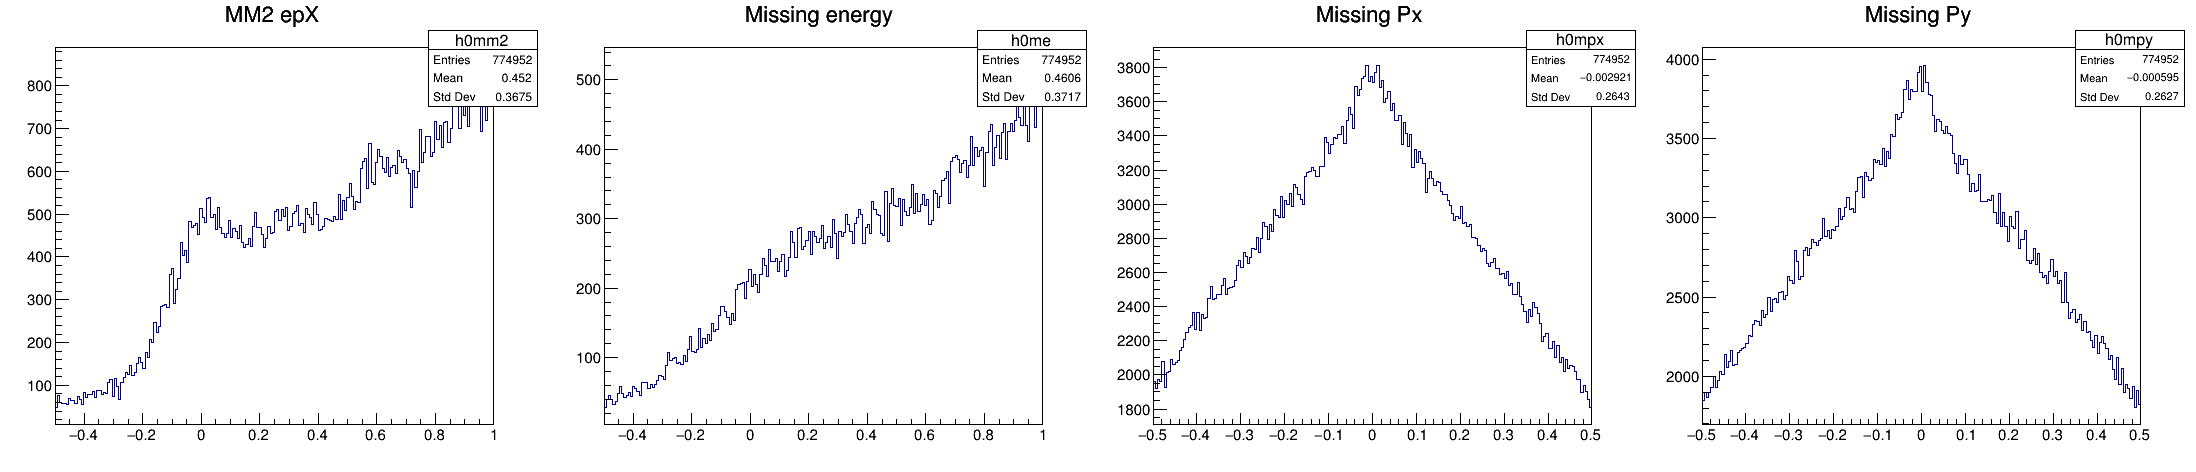

In [20]:
c1 = ROOT.TCanvas("c1","c1",2200,500)
c1.Divide(4,1,0.0001,0.0001)
c1.Draw()
c1.cd(1)
h0mm2.Draw()
c1.cd(2)
h0me.Draw()
c1.cd(3)
h0mpx.Draw()
c1.cd(4)
h0mpy.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


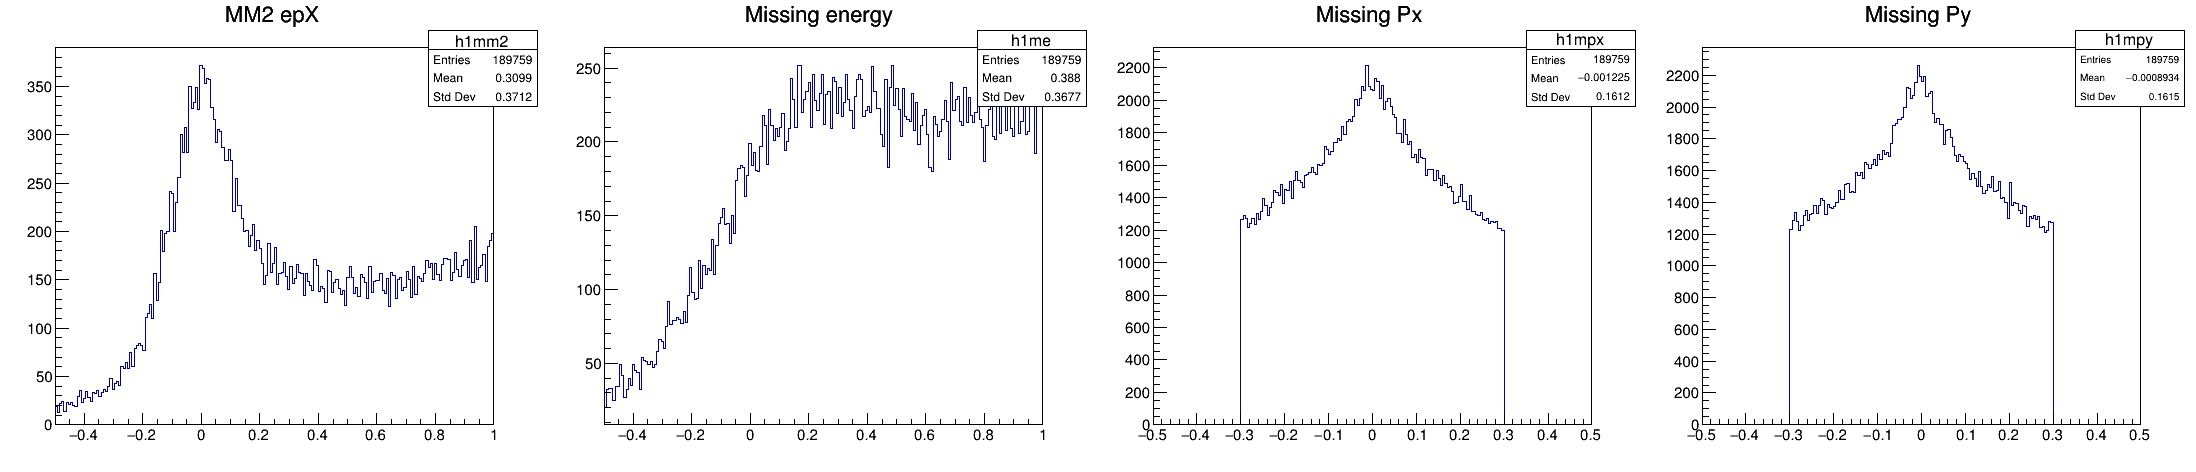

In [21]:
c1 = ROOT.TCanvas("c1","c1",2200,500)
c1.Divide(4,1,0.0001,0.0001)
c1.Draw()
c1.cd(1)
h1mm2.Draw()
c1.cd(2)
h1me.Draw()
c1.cd(3)
h1mpx.Draw()
c1.cd(4)
h1mpy.Draw()